# 6.4 Machine Learning
This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis


# 1 + 2 . Importing libraries and data inklusive scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\peter\Documents\Citibike'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_c.csv'), index_col = False)

# 3 Data Cleaning

In [6]:
df.head()

,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,time_of_day
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28,Evening & Night
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34,Evening & Night
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05,Evening & Night
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58,Mid-day & Afternoon
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08,Evening & Night


In [18]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

day_of_the_week            0
start_hour                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
time_of_day                0
start_date                 0
end_date                   0
end_hour                   0
dtype: int64

In [19]:
dups = df.duplicated()

In [20]:
dups.shape # No dups

(42993,)

In [7]:
# drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,time_of_day
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28,Evening & Night
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34,Evening & Night
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05,Evening & Night
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58,Mid-day & Afternoon
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08,Evening & Night


In [9]:
# Convert 'start_of_ride' to datetime if it's not already in that format
df['start_of_ride'] = pd.to_datetime(df['start_of_ride'])

# Separate 'start_of_ride' into 'start_date' and 'start_hour' columns
df['start_date'] = df['start_of_ride'].dt.date
df['start_hour'] = df['start_of_ride'].dt.hour

# Display the updated DataFrame
print(df[['start_of_ride', 'start_date', 'start_hour']])


            start_of_ride  start_date  start_hour
0     2013-09-09 18:18:55  2013-09-09          18
1     2013-09-12 18:38:53  2013-09-12          18
2     2013-09-18 19:44:04  2013-09-18          19
3     2013-09-28 11:54:37  2013-09-28          11
4     2013-09-27 22:01:01  2013-09-27          22
...                   ...         ...         ...
42988 2013-09-28 15:30:14  2013-09-28          15
42989 2013-09-01 16:27:11  2013-09-01          16
42990 2013-09-14 17:32:26  2013-09-14          17
42991 2013-09-07 18:08:21  2013-09-07          18
42992 2013-09-23 21:54:36  2013-09-23          21

[42993 rows x 3 columns]


In [10]:
# Convert 'end_of_ride' to datetime if it's not already in that format
df['end_of_ride'] = pd.to_datetime(df['end_of_ride'])

# Separate 'end_of_ride' into 'end_date' and 'end_hour' columns
df['end_date'] = df['end_of_ride'].dt.date
df['end_hour'] = df['end_of_ride'].dt.hour

# Display the updated DataFrame
print(df[['end_of_ride', 'end_date', 'end_hour']])


              end_of_ride    end_date  end_hour
0     2013-09-09 18:35:28  2013-09-09        18
1     2013-09-12 18:48:34  2013-09-12        18
2     2013-09-18 19:50:05  2013-09-18        19
3     2013-09-28 12:03:58  2013-09-28        12
4     2013-09-27 22:08:08  2013-09-27        22
...                   ...         ...       ...
42988 2013-09-28 15:46:29  2013-09-28        15
42989 2013-09-01 16:52:52  2013-09-01        16
42990 2013-09-14 17:52:17  2013-09-14        17
42991 2013-09-07 18:25:51  2013-09-07        18
42992 2013-09-23 22:00:46  2013-09-23        22

[42993 rows x 3 columns]


In [11]:
df.head()

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,time_of_day,start_date,end_date,end_hour
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28,Evening & Night,2013-09-09,2013-09-09,18
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34,Evening & Night,2013-09-12,2013-09-12,18
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05,Evening & Night,2013-09-18,2013-09-18,19
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58,Mid-day & Afternoon,2013-09-28,2013-09-28,12
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08,Evening & Night,2013-09-27,2013-09-27,22


In [12]:
# drop unnecessary columns
df = df.drop(columns=['start_of_ride'])
df = df.drop(columns=['end_of_ride'])

In [13]:
df.head()

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,time_of_day,start_date,end_date,end_hour
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,Evening & Night,2013-09-09,2013-09-09,18
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,Evening & Night,2013-09-12,2013-09-12,18
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,Evening & Night,2013-09-18,2013-09-18,19
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,Mid-day & Afternoon,2013-09-28,2013-09-28,12
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,Evening & Night,2013-09-27,2013-09-27,22


In [14]:
# Calculate the average start_hour
average_start_hour = df['start_hour'].mean()

# Print the average start_hour
print(f"Average Start Hour: {average_start_hour:.2f}")

Average Start Hour: 14.09


In [15]:
# Calculate the average end_hour
average_end_hour = df['end_hour'].mean()

# Print the average end_hour
print(f"Average End Hour: {average_end_hour:.2f}")

Average End Hour: 14.23


In [16]:
df.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,437.205545,40.734477,-73.990948,434.577094,40.734070,-73.991242,770.502105,1975.674459,14.227339
std,4.932889,340.848654,0.019598,0.012367,332.801118,0.019603,0.012375,523.444233,10.938735,4.976910
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,0.000000
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,10.000000
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,15.000000
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,999.000000,1984.000000,18.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,23.000000


# 4 Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

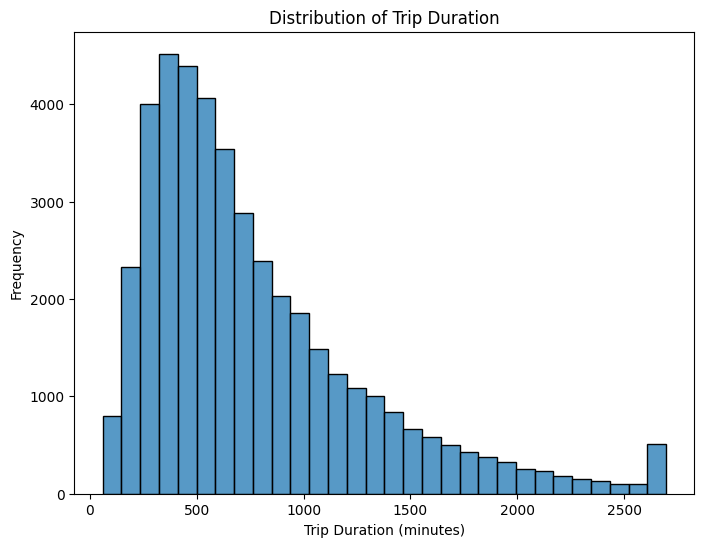

In [17]:
#looking for extreme values

# Create a distribution plot (histplot) for the 'trip_duration' column
plt.figure(figsize=(8, 6))
sns.histplot(df['trip_duration'], bins=30, kde=False, edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Define data types for specific columns
data_types = {
    'start_date': 'datetime64[ns]'}  # Assuming you want datetime data type
# Use the 'astype' method to apply the data types to the DataFrame
df = df.astype(data_types)

In [23]:
parse_dates = ['start_date'], ['ride_count'], ['days_of_the_week']

In [24]:
# Convert 'start_hour' to string and add a space character
df['start_hour'] = ' ' + df['start_hour'].astype(str)

In [26]:
# Convert 'start_date' to datetime if it's not already
df['start_date'] = pd.to_datetime(df['start_date'])

# Ensure 'start_hour' is in the correct format
# Assuming 'start_hour' is a string representing the hour in 'H' or 'HH' format
df['start_hour'] = df['start_hour'].astype(str).str.zfill(2) + ':00'

# Combine 'start_date' and 'start_hour' columns to create a new datetime column
df['start_time'] = pd.to_datetime(df['start_date'].dt.strftime('%Y-%m-%d') + ' ' + df['start_hour'], format='%Y-%m-%d %H:%M')

# Group by 'start_time' and count the number of rides for each hour of each day
hourly_counts = df.groupby('start_time').size().reset_index(name='ride_count')

# Now, 'hourly_counts' contains the number of rides taken on each hour of each day
print(hourly_counts)

             start_time  ride_count
0   2013-09-01 00:00:00          15
1   2013-09-01 01:00:00          12
2   2013-09-01 02:00:00           9
3   2013-09-01 03:00:00           2
4   2013-09-01 04:00:00           3
..                  ...         ...
706 2013-09-30 19:00:00         140
707 2013-09-30 20:00:00          78
708 2013-09-30 21:00:00          43
709 2013-09-30 22:00:00          40
710 2013-09-30 23:00:00          17

[711 rows x 2 columns]


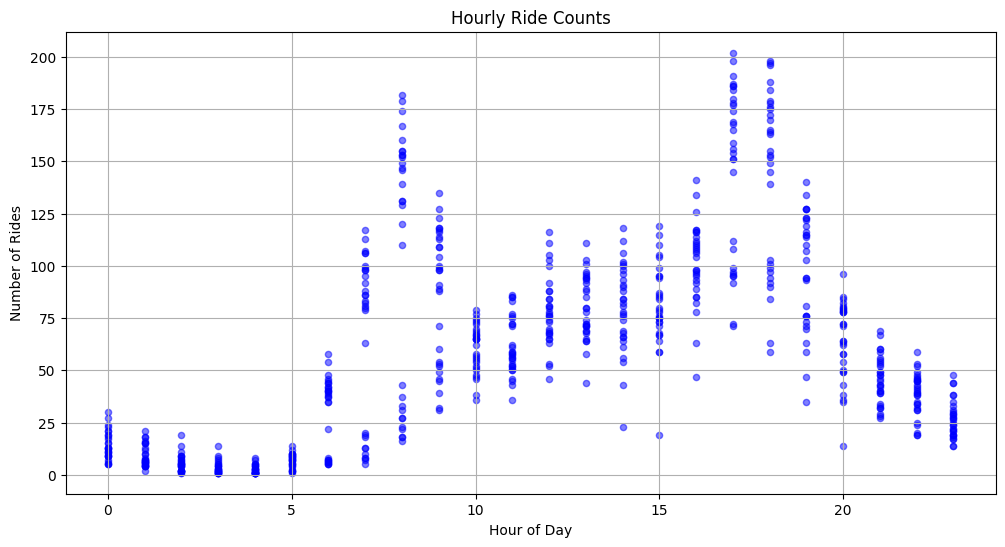

In [27]:
# Extract the hours and ride counts
hours = hourly_counts['start_time'].dt.hour
ride_counts = hourly_counts['ride_count']

# Create the scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(hours, ride_counts, s=20, alpha=0.5, color='blue')
plt.title('Hourly Ride Counts')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

In [28]:
# Group by the hour of 'start_time' and calculate the mean ride count
hourly_average = hourly_counts.groupby(hourly_counts['start_time'].dt.hour)['ride_count'].mean()

# Display the average rides per hour
print(hourly_average)

start_time
0      14.000000
1       8.866667
2       5.586207
3       3.692308
4       2.777778
5       6.724138
6      29.633333
7      66.000000
8     104.233333
9      86.600000
10     60.900000
11     61.366667
12     78.433333
13     80.266667
14     80.033333
15     81.200000
16    101.533333
17    146.600000
18    142.666667
19     97.666667
20     64.400000
21     45.700000
22     38.633333
23     26.766667
Name: ride_count, dtype: float64


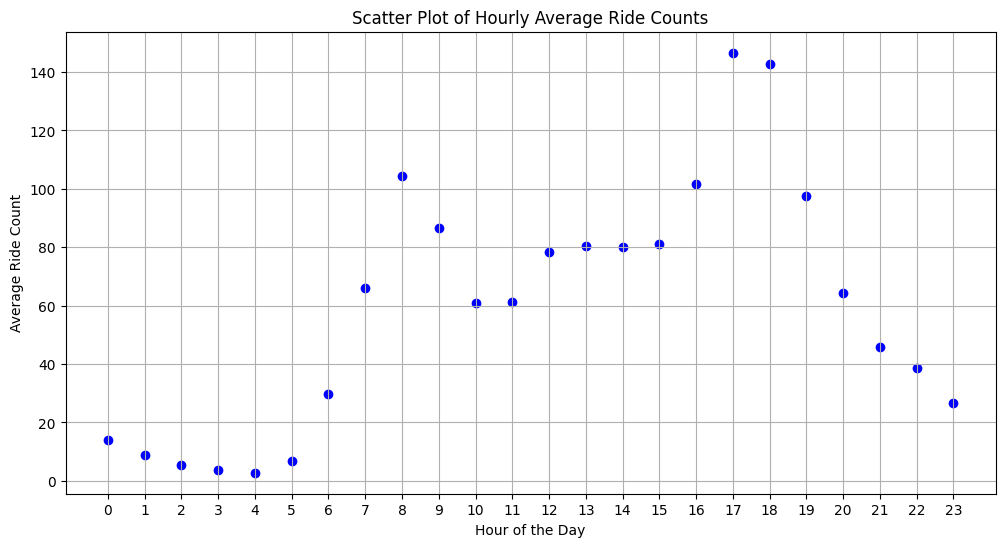

In [29]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(hourly_average.index, hourly_average.values, marker='o', color='blue')

# Customize the plot
plt.title('Scatter Plot of Hourly Average Ride Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Ride Count')
plt.xticks(hourly_average.index)  # Set x-axis ticks to match the hours
plt.grid(True)

# Show the plot
plt.show()

In [30]:
# Group by the date part of 'start_time' and calculate the sum of ride counts
day_counts = hourly_counts.groupby(hourly_counts['start_time'].dt.date)['ride_count'].sum()

# Display the total number of rides for each day
print(day_counts)

start_time
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: ride_count, dtype: int64


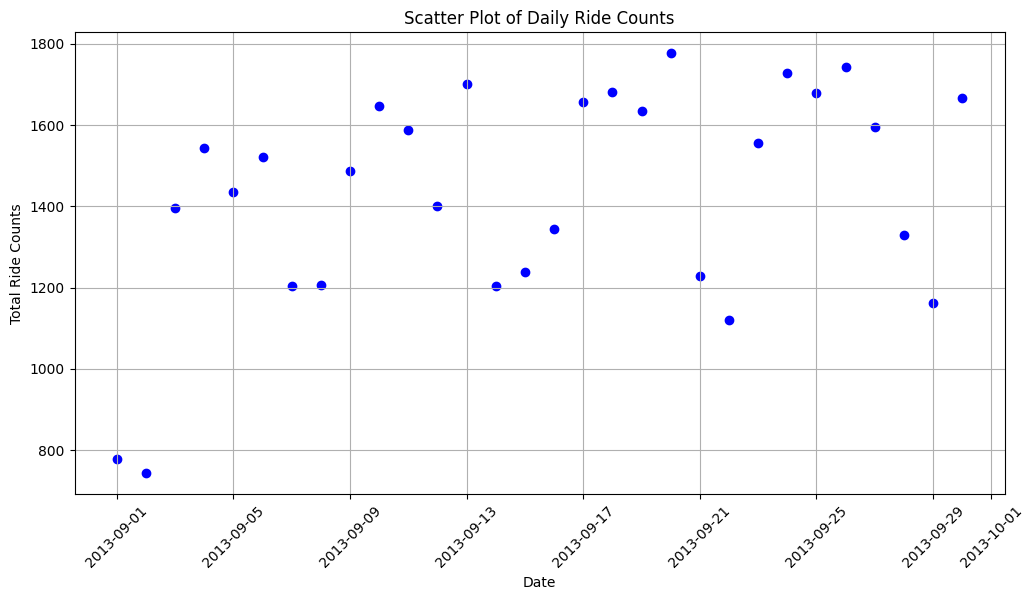

In [31]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(day_counts.index, day_counts.values, marker='o', color='blue')

# Customize the plot
plt.title('Scatter Plot of Daily Ride Counts')
plt.xlabel('Date')
plt.ylabel('Total Ride Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

In [33]:
# Group by 'start_time' and count the number of rides for each hour of each day
day_hour_counts = df.groupby([df['start_time'].dt.date, df['start_time'].dt.hour]).size().unstack(fill_value=0)

# Fill missing hours with 0 rides for each day
all_hours = range(24)
day_hour_counts = day_hour_counts.reindex(columns=all_hours, fill_value=0)

# Display the day_hour_counts DataFrame
print(day_hour_counts)

start_time  0   1   2   3   4   5   6    7    8    9   ...   14   15   16  \
start_time                                             ...                  
2013-09-01  15  12   9   2   3   2   8    5   18   31  ...   56   71   63   
2013-09-02  15  10   7   1   3   2   6    8   16   32  ...   23   19   47   
2013-09-03   5   8   2   0   2   4  38   63  139   91  ...   68   59   85   
2013-09-04   9   7   5   3   1   7  42   98  167   89  ...   61   64   98   
2013-09-05  13   5   2   2   1   4  45   81  110   98  ...   69   59  109   
2013-09-06  13  13   5   3   1   7  22   92  120  104  ...   88   67  141   
2013-09-07  21  15   5   7   5   8   6   10   33   53  ...   82   99   98   
2013-09-08  30  16   9   5   7   0   5   13   27   39  ...  101   95  107   
2013-09-09  11   5   1   2   0   9  41   86  129   98  ...   66   75   82   
2013-09-10   9   6   2   2   2  10  40   98  146   99  ...   78   73   85   
2013-09-11  18   4   6   2   1   7  44  107  153  118  ...   54   73   95   

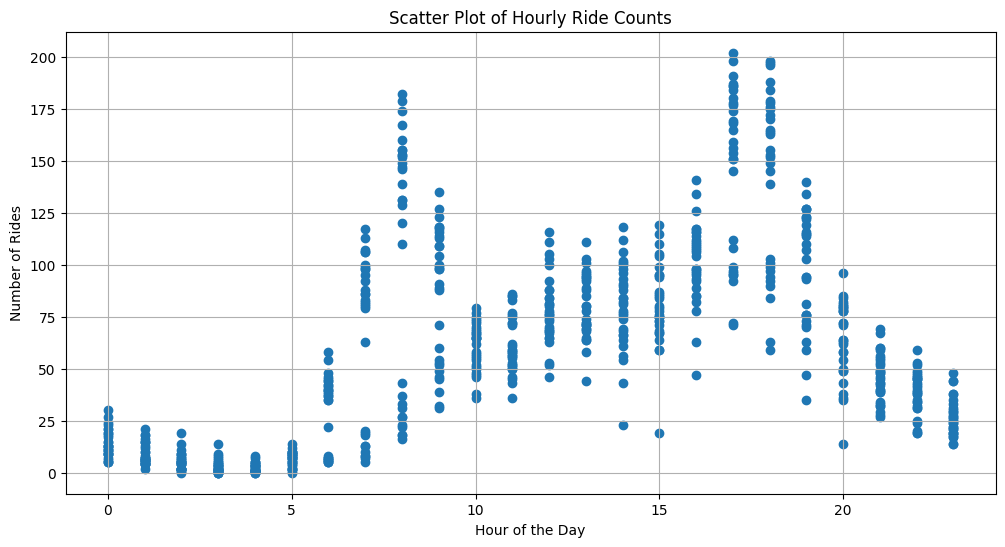

In [34]:
# Create a scatter plot of the day_hour_counts DataFrame

# Flatten the day_hour_counts DataFrame into separate x and y arrays
hours = day_hour_counts.columns.to_list()
y = day_hour_counts.values.flatten()

# Create an array of x values repeating hours for each day
days = day_hour_counts.index
x = np.tile(hours, len(days))

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, marker='o')

# Customize the plot
plt.title('Scatter Plot of Hourly Ride Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.grid(True)

# Show the plot
plt.show()

# 5 State your hypothesis in a markdown cell within your Jupyter notebook.

# Hypotheses

Null Hypothesis (H0): Usage patterns do not significantly vary across different days of the week.

Alternative Hypothesis (H1): Usage patterns significantly vary across different days of the week.

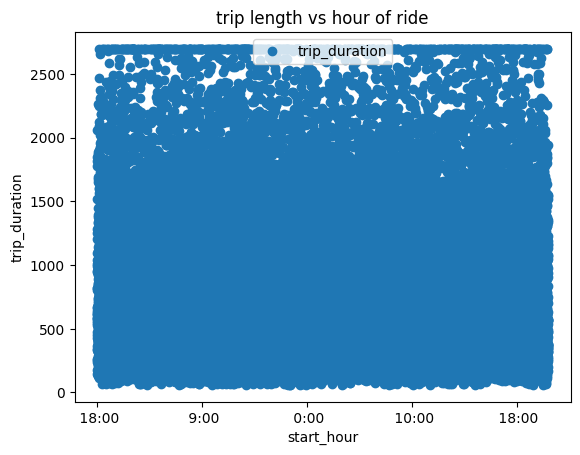

In [35]:
# Create a scatterplot using matplotlib for another test between variables

df.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip length vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [37]:
ride_count = pd.get_dummies(df, columns=['day_of_the_week', 'start_hour'], drop_first=True)

In [38]:
ride_count

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,...,start_hour_ 22:00,start_hour_ 23:00,start_hour_ 2:00,start_hour_ 3:00,start_hour_ 4:00,start_hour_ 5:00,start_hour_ 6:00,start_hour_ 7:00,start_hour_ 8:00,start_hour_ 9:00
0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,...,False,False,False,False,False,False,False,False,False,False
1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,...,False,False,False,False,False,False,False,False,False,False
2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,...,False,False,False,False,False,False,False,False,False,False
3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,...,False,False,False,False,False,False,False,False,False,False
4,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,...,False,False,False,False,False,False,False,False,False,False
42989,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,...,False,False,False,False,False,False,False,False,False,False
42990,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,...,False,False,False,False,False,False,False,False,False,False
42991,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,...,False,False,False,False,False,False,False,False,False,False


In [39]:
ride_count.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'time_of_day', 'start_date',
       'end_date', 'end_hour', 'start_time', 'day_of_the_week_Mon',
       'day_of_the_week_Sat', 'day_of_the_week_Sun', 'day_of_the_week_Thu',
       'day_of_the_week_Tue', 'day_of_the_week_Wed', 'start_hour_ 10:00',
       'start_hour_ 11:00', 'start_hour_ 12:00', 'start_hour_ 13:00',
       'start_hour_ 14:00', 'start_hour_ 15:00', 'start_hour_ 16:00',
       'start_hour_ 17:00', 'start_hour_ 18:00', 'start_hour_ 19:00',
       'start_hour_ 1:00', 'start_hour_ 20:00', 'start_hour_ 21:00',
       'start_hour_ 22:00', 'start_hour_ 23:00', 'start_hour_ 2:00',
       'start_hour_ 3:00', 'start_hour_ 4:00', 'start_hour_ 5:00',
       'start_hour_ 6:00', 'start_hour_ 7:00', 'start_hour_ 8:00',
      

In [40]:
# rides per hour count
rides_per_hour = df.groupby('start_hour').size()

In [41]:
# amount of rides taken per hour of each day
hour_counts = df.groupby('start_hour')['start_date'].count()

In [42]:
hour_counts

start_hour
 0:00      420
 10:00    1827
 11:00    1841
 12:00    2353
 13:00    2408
 14:00    2401
 15:00    2436
 16:00    3046
 17:00    4398
 18:00    4280
 19:00    2930
 1:00      266
 20:00    1932
 21:00    1371
 22:00    1159
 23:00     803
 2:00      162
 3:00       96
 4:00       75
 5:00      195
 6:00      889
 7:00     1980
 8:00     3127
 9:00     2598
Name: start_date, dtype: int64

In [43]:
# Convert 'start_time' column to datetime if it's not already
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract the hour from the 'start_time' column and create a new column 'start_hour'
df['start_hour'] = df['start_time'].dt.hour

# Group by 'start_hour', calculate the count of rides and the average trip duration per hour
hourly_aggregated = df.groupby('start_hour').agg(
    avg_trip_duration=('trip_duration', 'mean'),
    ride_count=('start_time', 'count')
).reset_index()

# Print the results
print(hourly_aggregated)

    start_hour  avg_trip_duration  ride_count
0            0         748.716667         420
1            1         702.657895         266
2            2         659.561728         162
3            3         687.020833          96
4            4         667.106667          75
5            5         605.348718         195
6            6         648.613048         889
7            7         727.038384        1980
8            8         756.595459        3127
9            9         728.346035        2598
10          10         745.684729        1827
11          11         760.065182        1841
12          12         732.083723        2353
13          13         748.196844        2408
14          14         788.499792        2401
15          15         784.350575        2436
16          16         809.883454        3046
17          17         822.308322        4398
18          18         826.911215        4280
19          19         782.310580        2930
20          20         776.412526 

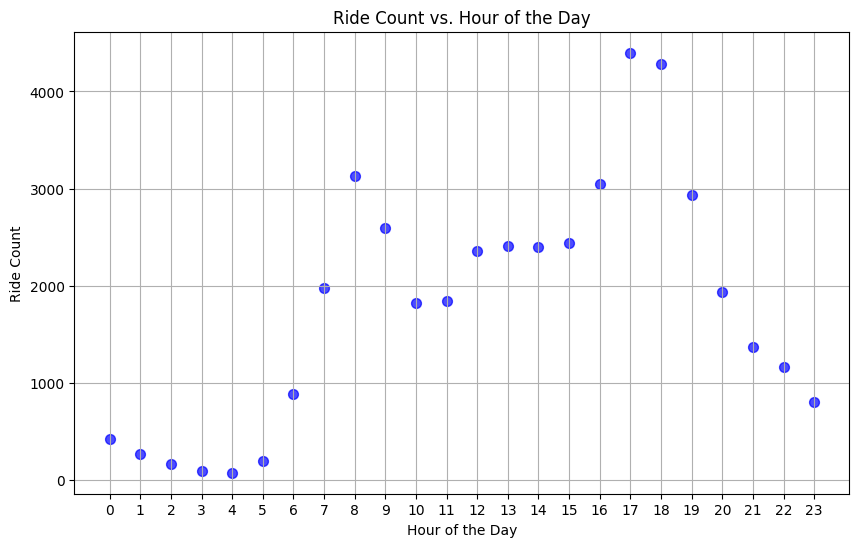

In [44]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hourly_aggregated['start_hour'], hourly_aggregated['ride_count'], s=50, c='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Count')
plt.title('Ride Count vs. Hour of the Day')

# Customize the plot (optional)
plt.grid(True)  # Add gridlines (optional)
plt.xticks(range(24))  # Set x-axis ticks to show all hours (0-23)

# Show the plot
plt.show()

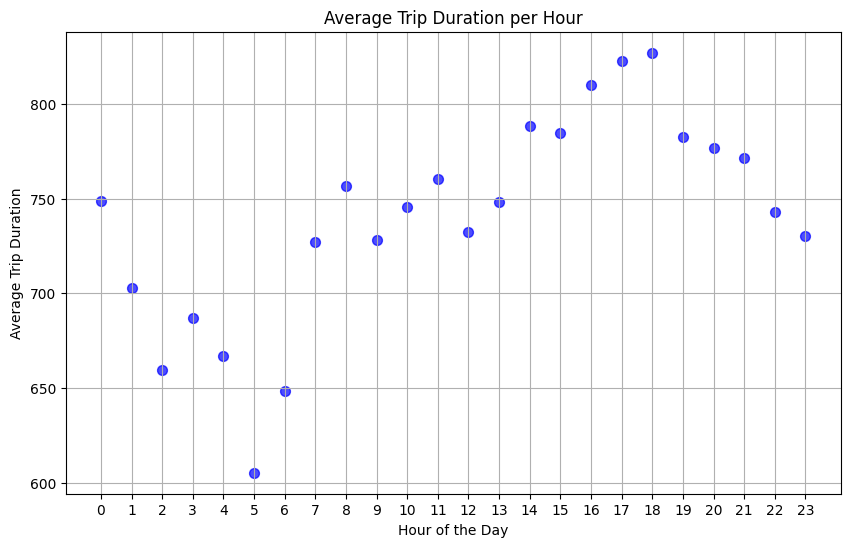

In [45]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hourly_aggregated['start_hour'], hourly_aggregated['avg_trip_duration'], s=50, c='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration per Hour')

# Customize the plot (optional)
plt.grid(True)  # Add gridlines (optional)
plt.xticks(range(24))  # Set x-axis ticks to show all hours (0-23)

# Show the plot
plt.show()

In [48]:
# Calculate the IQR (Interquartile Range) to help indentify busiest hours
Q1 = hourly_aggregated['ride_count'].quantile(0.25)
Q3 = hourly_aggregated['ride_count'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Find the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [start_hour, avg_trip_duration, ride_count]
Index: []


In [49]:
# Calculate the IQR (Interquartile Range) to help indentify busiest hours
Q1 = hourly_aggregated['avg_trip_duration'].quantile(0.25)
Q3 = hourly_aggregated['avg_trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Find the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

# Print the outliers
print("Outliers_1:")
print(outliers_1)

Outliers_1:
   start_hour  avg_trip_duration  ride_count
5           5         605.348718         195


In [51]:
# Calculate the IQR (Interquartile Range) of trip_duration in citi_b
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Find the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers_2 = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]

# Print the outliers
print("Outliers_2:")
print(outliers_2)

Outliers_2:
      day_of_the_week  start_hour  start_station_id  \
27                Thu          16               471   
55                Wed          17               469   
179               Mon          14               342   
183               Tue          10               391   
197               Thu          17              2006   
...               ...         ...               ...   
42837             Sun          18               448   
42902             Tue           7               278   
42903             Sun          16               242   
42909             Mon          16               493   
42969             Wed           8               469   

               start_station_name  start_station_latitude  \
27        Grand St & Havemeyer St               40.712868   
55             Broadway & W 53 St               40.763441   
179    Columbia St & Rivington St               40.717400   
183           Clark St & Henry St               40.697601   
197        Central Par

In [52]:
df.shape

(42993, 19)

In [53]:
outliers_2.shape

(1976, 19)

In [54]:
# Filter out the outliers
df_no_outliers = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

In [55]:
df_no_outliers.shape

(41017, 19)

# Another test to proof the hypothesis

In [57]:
# Convert 'start_date' to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Group by 'days_of_the_week' and count the occurrences
day_counts = df.groupby('day_of_the_week').size().reset_index(name='count')

# Optionally, you can set 'days_of_the_week' as the index
day_counts.set_index('day_of_the_week', inplace=True)

# Print the resulting day_counts DataFrame
print(day_counts)

                 count
day_of_the_week       
Fri               6594
Mon               6797
Sat               4965
Sun               5506
Thu               6212
Tue               6429
Wed               6490


In [59]:
daily_aggregated = df.groupby('day_of_the_week').agg({
    'start_date': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

daily_aggregated.rename(columns={'start_date': 'ride_counts', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [60]:
daily_aggregated

,day_of_the_week,ride_counts,avg_trip_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


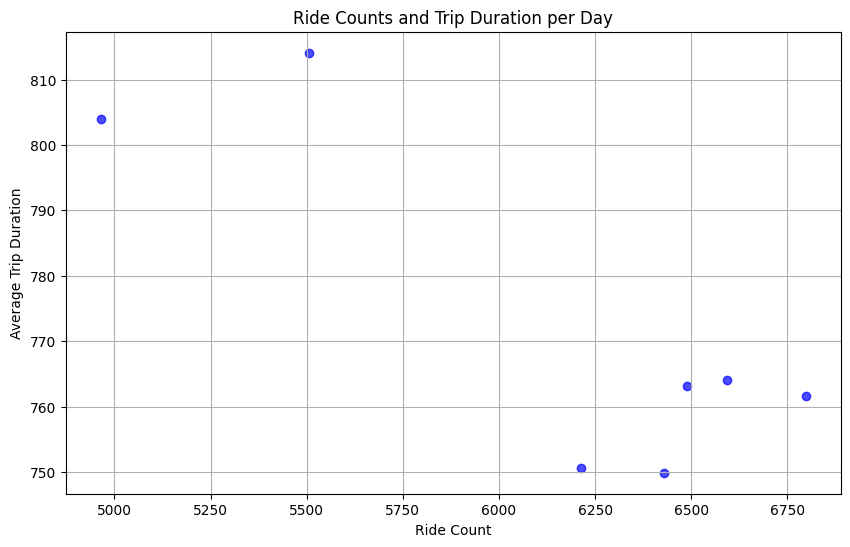

In [61]:
# Create a scatter plot for daily_aggregated
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(daily_aggregated['ride_counts'], daily_aggregated['avg_trip_duration'], c='blue', alpha=0.7)

# Add labels and a title
plt.title('Ride Counts and Trip Duration per Day')  
plt.xlabel('Ride Count')  
plt.ylabel('Average Trip Duration')  

# Customize the plot (optional)
plt.grid(True)  # Add gridlines

# Show the plot
plt.show()

# 6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [62]:
# Assuming you have the daily_aggregated DataFrame

X = daily_aggregated['ride_counts'].to_numpy()
y = daily_aggregated['avg_trip_duration'].to_numpy()

# Now 'X' and 'y' are NumPy arrays

In [63]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9

In [64]:
y

array([764.06172278, 761.58555245, 804.03504532, 814.10770069,
       750.65663232, 749.88645201, 763.15362096])

# 7 Split the data into two sets: a training set and a test set.

In [65]:
# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter determines the proportion of data to allocate to the test set.
# The 'random_state' parameter ensures reproducibility by fixing the random seed.

# Now there are four arrays: X_train, X_test, y_train, and y_test.
# X_train and y_train are the training data and labels.
# X_test and y_test are test data and labels.

# 8 Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [66]:
# Create a LinearRegression model
model = LinearRegression()

# Reshape X_train and y_train to be two-dimensional
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Reshape X_test to be two-dimensional
X_test = X_test.reshape(-1, 1)

# Predict y values for the test set
y_pred = model.predict(X_test)

# 9 Create a plot that shows the regression line on the test set.

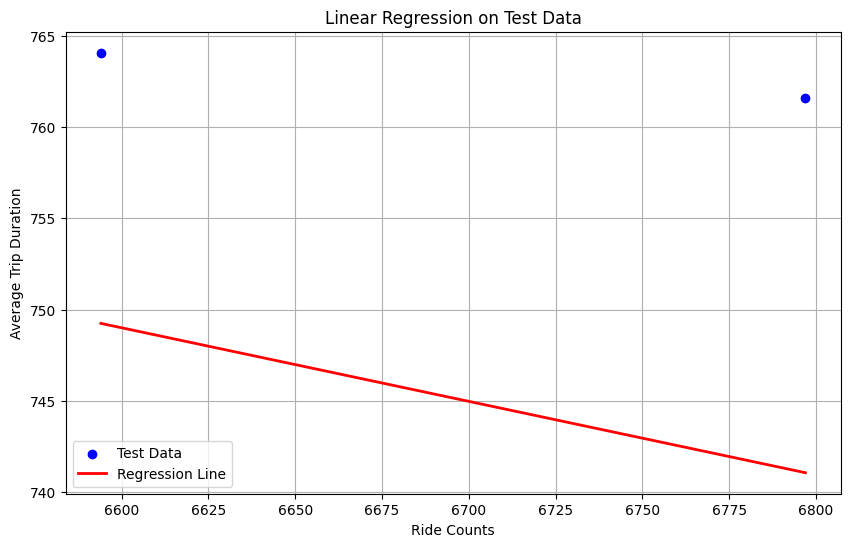

In [68]:
# Scatter plot of the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Set labels and title
plt.xlabel('Ride Counts')
plt.ylabel('Average Trip Duration')
plt.title('Linear Regression on Test Data')

# Show legend in the lower left corner
plt.legend(loc='lower left')

# Customize the plot (optional)
plt.grid(True)  # Add gridlines

# Show the plot
plt.show()

# 10 Write your own interpretation of how well the line appears to fit the data in a markdown cell. 

# The regression line goes downwards, showing that as one variable increases, the other variable decreases. This means there is an inverse relationship between the two variables.

# 11 Check the model performance statistics—MSE and R2 score.

In [69]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 320.08105679433334
R-squared (R2) Score: -207.81367322639673


# 12 Compare the predicted y values with the actual y values in a dataframe.

In [70]:
# Reshape the arrays to have a single column
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_df.head()

,Actual,Predicted
0,764.061723,749.247606
1,761.585552,741.074481


# Interpreting the Results:

The predicted values are not very close to the actual values, indicating a weak linear relationship between the "Actual" and "Predicted" columns.

Additionally, the high Mean Squared Error (MSE) and low R-squared (R2) values suggest that the model is not performing well.

# 13 Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

# Reflections on Data Bias and Model Performance on the Test Set:

Model Performance on the Test Set:
The model does not perform very well on the test data. Here’s why:

Actual vs. Predicted Values: The predicted ride durations do not match the actual durations closely. There is a lot of variability in the predictions, showing a weak linear relationship between the two variables. This suggests that the model is missing some important patterns in the data.

Mean Squared Error (MSE): The high MSE value indicates that the predictions are far from the actual values on average. In regression tasks, we want a lower MSE because it means the predictions are closer to the true values.

R-squared (R2): The low R-squared score means that the model explains very little of the variation in ride durations. This suggests the model is not good at predicting ride duration based on ride counts.

Reflections on Possible Data Bias:

Representative Data: The data used for training may not represent all bike rides well, leading to biased results.

Feature Selection: The features (independent variables) chosen for the model might introduce bias if they do not capture all relevant aspects of the rides.

Temporal Changes: The dataset might not account for changes over time, which could result in a biased model.

In [71]:

# Exporting new dataset

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_d.csv')) 